In [529]:
import os, geopandas as gpd

In [530]:
countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))

In [531]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [532]:
# dimensions
countries.shape

(252, 2)

In [533]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [534]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [535]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [536]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

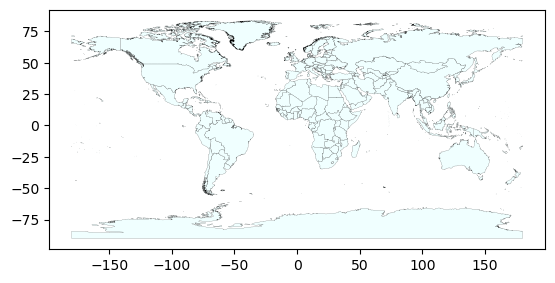

In [537]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [538]:
cities=gpd.read_file(os.path.join("data","World_Cities","World_Cities.shp"))
rivers=gpd.read_file(os.path.join("data","World_Hydrography","World_Hydrography.shp"))

<Axes: >

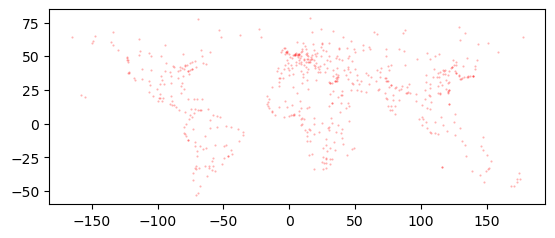

In [539]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

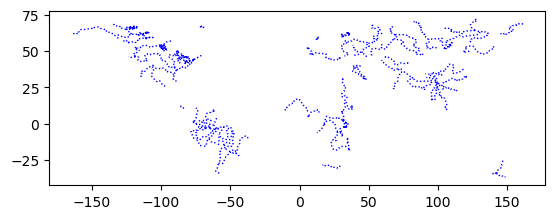

In [540]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

In [541]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

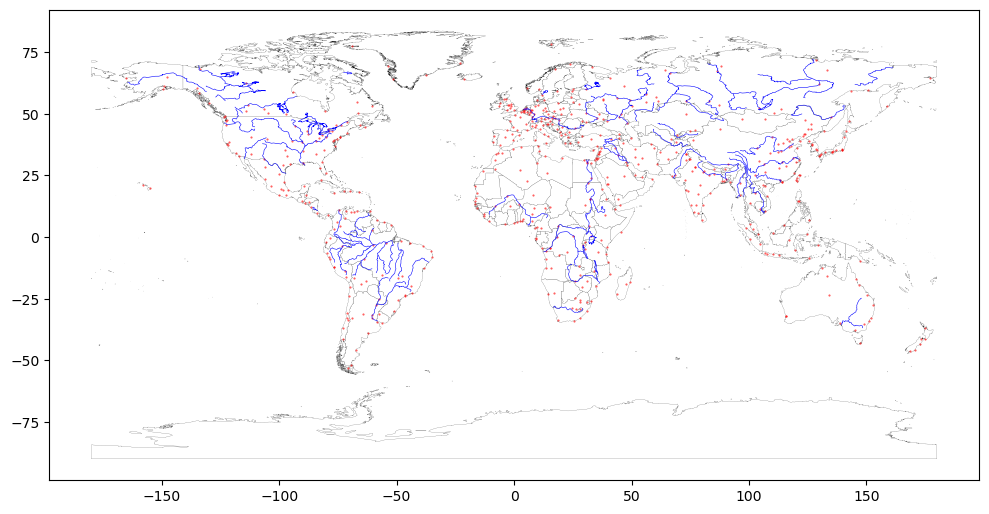

In [542]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...
rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...

In [543]:
countries.to_file(os.path.join("data","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("data","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("data","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

# Definimos el país (Algeria)

In [545]:
Algeria=countries[countries.COUNTRY=='Algeria']

In [546]:
citiesAlgeria_clipped = gpd.clip(gdf=cities,
                          mask=Algeria)
riversAlgeria_clipped = gpd.clip(gdf=rivers,
                               mask=Algeria)

In [547]:
riversAlgeria_clipped

,NAME,SYSTEM,geometry


<Axes: >

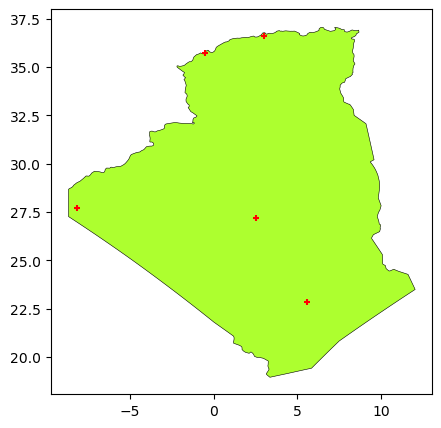

In [548]:
base = Algeria.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesAlgeria_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)

## hay un error porque no hay ríos en aregelia en el mapa proporcionado
# riversAlgeria_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)

<Axes: >

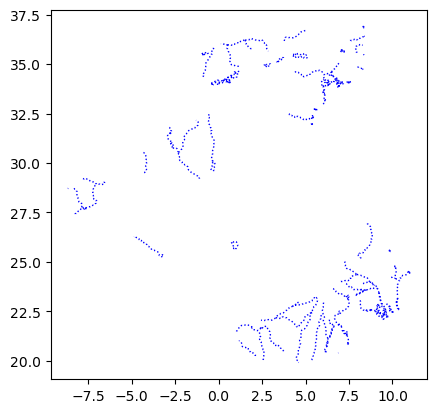

In [549]:
#agregamos el mapa de ríos de algeria
Ariver=gpd.read_file(os.path.join("data","dza_rivers","DZA_watrcrsl_rvr_3m_arcworld.shp"))
Ariver.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

In [550]:
#revisamos el CRS
print(Ariver.crs)

EPSG:4326


<Axes: >

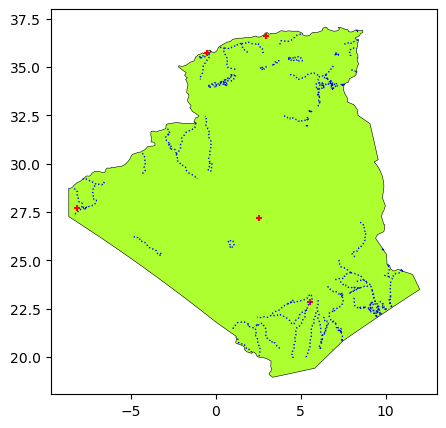

In [551]:
#volvemos a plotear
base = Algeria.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesAlgeria_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
Ariver.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted', ax=base)

In [552]:
Algeria.geom_type

3    Polygon
dtype: object

In [553]:
citiesAlgeria_clipped.geom_type

472    Point
437    Point
392    Point
553    Point
405    Point
dtype: object

In [554]:
riversAlgeria_clipped.geom_type

Series([], dtype: object)

# Proyección de Mapa Algeria

In [556]:
# check units
Algeria.crs.axis_info
print(Algeria.crs)

EPSG:4326


In [557]:
# centroid
Algeria.centroid

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\3866060934.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria.centroid


3    POINT (2.63239 28.16324)
dtype: geometry

## Reploteamos

In [559]:
# recommended for Algeria (meters)
Algeria.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [560]:
# now this works
Algeria.to_crs(4326).centroid

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\2524267460.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria.to_crs(4326).centroid


3    POINT (2.63239 28.16324)
dtype: geometry

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\371973805.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

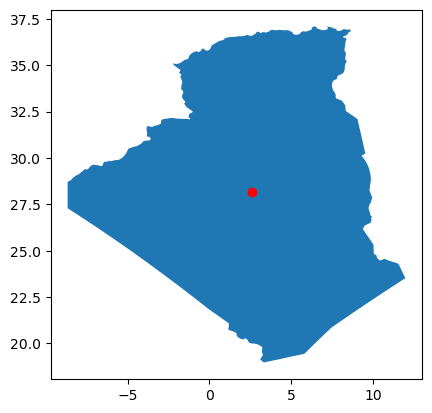

In [561]:
# replotting:

base4326=Algeria.to_crs(4326).plot()
Algeria.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [562]:
Algeria_4326=Algeria.to_crs(4326)

cities_Algeria_4326=citiesAlgeria_clipped.to_crs(Algeria_4326.crs)

rivers_Algeria_4326=riversAlgeria_clipped.to_crs(Algeria_4326.crs)

In [563]:
# saving 
import os

Algeria_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_Algeria_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_Algeria_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='rivers', driver="GPKG")

C:\Users\Luis\anaconda3\Lib\site-packages\geopandas\io\file.py:612: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [564]:
Algeria_4326.centroid

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\204490581.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria_4326.centroid


3    POINT (2.63239 28.16324)
dtype: geometry

In [565]:
Algeria_4326.centroid.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\Luis\AppData\Local\Temp\ipykernel_5656\1090628872.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Algeria_4326.centroid.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='centroid', driver="GPKG")


## Agregamos Data Espacial de Aeropuertos

In [567]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,2050,DAAG,large_airport,Houari Boumediene Airport,36.693886,3.214531,82.0,AF,Algeria,DZ,...,Algiers,1,DAAG,ALG,NaN,NaN,https://en.wikipedia.org/wiki/Houari_Boumedien...,"Algiers, Maison Blanche",1275,2022-09-13T13:52:37+00:00
1,2071,DAOO,medium_airport,Oran Es-Sénia (Ahmed Ben Bella) International ...,35.623901,-0.621183,295.0,AF,Algeria,DZ,...,Es-Sénia,1,DAOO,ORN,NaN,NaN,https://en.wikipedia.org/wiki/Oran_Es_Senia_Ai...,Es Senia,750,2022-09-13T14:01:35+00:00
2,2060,DABB,medium_airport,Annaba Rabah Bitat Airport,36.826781,7.813340,16.0,AF,Algeria,DZ,...,Annaba,1,DABB,AAE,NaN,NaN,https://en.wikipedia.org/wiki/Rabah_Bitat_Airport,"Les Salines Airport, El Mellah Airport, Annabah",750,2022-09-13T13:43:09+00:00
3,2061,DABC,medium_airport,Mohamed Boudiaf International Airport,36.276001,6.620390,2265.0,AF,Algeria,DZ,...,Constantine,1,DABC,CZL,NaN,NaN,https://en.wikipedia.org/wiki/Mohamed_Boudiaf_...,NaN,750,2008-06-13T14:30:04+00:00
95,341283,DZ-0010,heliport,Timiaouine Heliport,20.439241,1.825415,NaN,AF,Algeria,DZ,...,Timiaouine,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-27T14:45:28+00:00
96,430160,DZ-0031,heliport,Tin Zaoutine Heliport,19.965270,2.961410,NaN,AF,Algeria,DZ,...,Tin Zaoutine,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-27T14:26:19+00:00
97,341284,DZ-0011,closed,Tinerkouk Airstrip,29.803220,0.609020,NaN,AF,Algeria,DZ,...,Tinerkouk,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-27T14:36:58+00:00
98,341280,DZ-0007,heliport,Zéralda Hospital Helipad,36.701290,2.843730,NaN,AF,Algeria,DZ,...,Zéralda,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-02-23T16:24:17+00:00


In [568]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,2071,DAOO,medium_airport,Oran Es-Sénia (Ahmed Ben Bella) International ...,35.623901,-0.621183,295.0,AF,Algeria,DZ,...,Es-Sénia,1,DAOO,ORN,NaN,NaN,https://en.wikipedia.org/wiki/Oran_Es_Senia_Ai...,Es Senia,750,2022-09-13T14:01:35+00:00
1,2060,DABB,medium_airport,Annaba Rabah Bitat Airport,36.826781,7.813340,16.0,AF,Algeria,DZ,...,Annaba,1,DABB,AAE,NaN,NaN,https://en.wikipedia.org/wiki/Rabah_Bitat_Airport,"Les Salines Airport, El Mellah Airport, Annabah",750,2022-09-13T13:43:09+00:00
2,2061,DABC,medium_airport,Mohamed Boudiaf International Airport,36.276001,6.620390,2265.0,AF,Algeria,DZ,...,Constantine,1,DABC,CZL,NaN,NaN,https://en.wikipedia.org/wiki/Mohamed_Boudiaf_...,NaN,750,2008-06-13T14:30:04+00:00
3,2056,DAAT,medium_airport,Aguenar – Hadj Bey Akhamok Airport,22.811501,5.451080,4518.0,AF,Algeria,DZ,...,Tamanrasset,1,DAAT,TMR,NaN,NaN,https://en.wikipedia.org/wiki/Tamanrasset_Airport,NaN,750,2023-01-26T08:36:23+00:00
4,2067,DAOF,medium_airport,Tindouf Airport,27.700399,-8.167100,1453.0,AF,Algeria,DZ,...,Tindouf,1,DAOF,TIN,NaN,NaN,https://en.wikipedia.org/wiki/Tindouf_Airport,NaN,750,2010-08-30T11:55:47+00:00


In [569]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [570]:
keep=['name','type','latitude_deg', 'longitude_deg','region_name','elevation_ft','municipality']
infoairports=infoairports.loc[:,keep]

In [571]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           98 non-null     object 
 1   type           98 non-null     object 
 2   latitude_deg   98 non-null     float64
 3   longitude_deg  98 non-null     float64
 4   region_name    98 non-null     object 
 5   elevation_ft   63 non-null     float64
 6   municipality   98 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.5+ KB


In [572]:
#some formatting 
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           98 non-null     object 
 1   type           98 non-null     object 
 2   latitude_deg   98 non-null     float64
 3   longitude_deg  98 non-null     float64
 4   region_name    98 non-null     object 
 5   elevation_ft   63 non-null     float64
 6   municipality   98 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.5+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

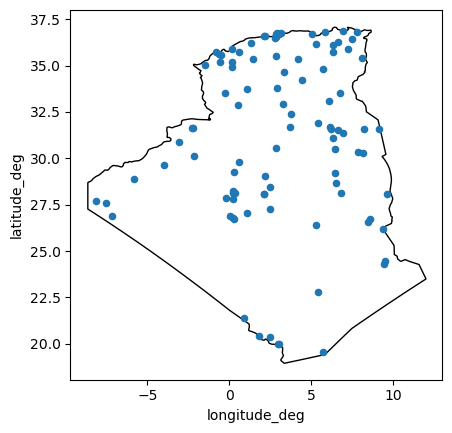

In [573]:
# let's plot

base = Algeria_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [574]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=Algeria.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

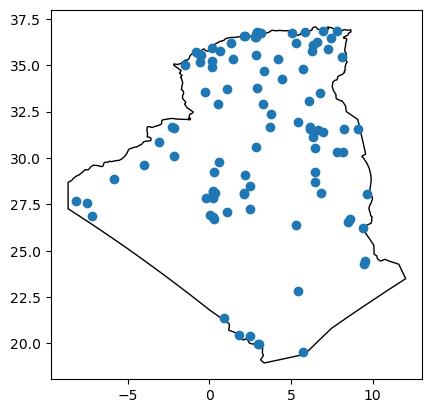

In [575]:
# does it look better?

# let's plot

base = Algeria_4326.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [576]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

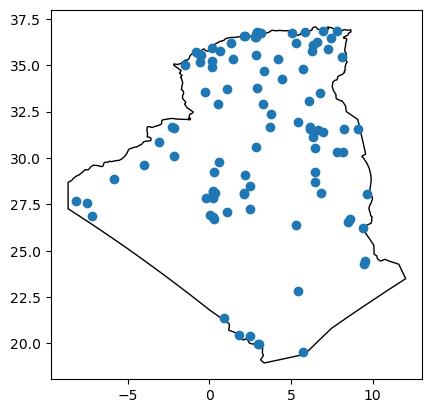

In [577]:
airports_4326=airports.to_crs(4326)

## then

base = Algeria_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [578]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     47
medium_airport    37
heliport           9
closed             5
Name: count, dtype: int64

In [579]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

In [580]:
# adding the airports
airports_4326.to_file(os.path.join("data","AlgeriaMaps_4326.gpkg"), layer='airports', driver="GPKG")

<Axes: >

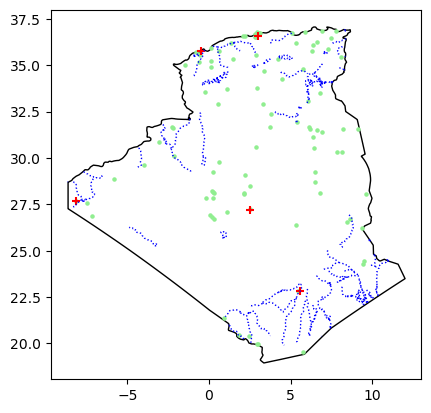

In [582]:
#Intentamos unirlo con ríos y ciudades
base = Algeria_4326.plot(color='white', edgecolor='black')

#Aeropuertos con puntos pequeños
airports_4326.plot(ax=base, color='lightgreen', markersize=5)

#Ciudades un poco más grandes
cities_Algeria_4326.plot(marker='+', color='red', markersize=40, ax=base)

Ariver.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted', ax=base)

## agregamos segundo nivel de administración 

In [584]:
admin2_Algeria = gpd.read_file("data/provincias/algeria_Province_level_2.geojson")

### lo proyectamos

In [586]:
admin2_Algeria_4326 =admin2_Algeria.to_crs(4326)

### lo ploteamos

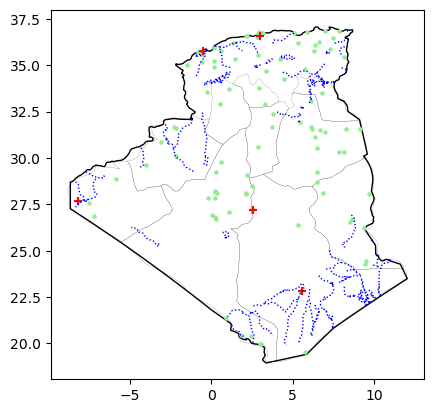

In [588]:
import matplotlib.pyplot as plt 
base = Algeria_4326.plot(color='white', edgecolor='black')

admin2_Algeria_4326.plot(facecolor='none', edgecolor='black', linewidth=0.1, ax=base)

#Aeropuertos con puntos pequeños
airports_4326.plot(ax=base, color='lightgreen', markersize=5)

#Ciudades un poco más grandes
cities_Algeria_4326.plot(marker='+', color='red', markersize=40, ax=base)

#Ríos de color azul
Ariver.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted', ax=base)

plt.show()

## Vemos los mapas

### Mapa Algeria y distritos gubernamentales

<Axes: >

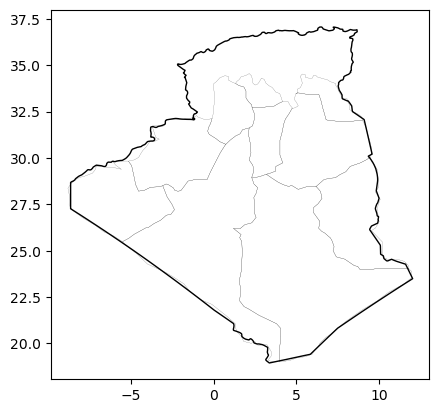

In [592]:
base = Algeria_4326.plot(color='white', edgecolor='black')

admin2_Algeria_4326.plot(facecolor='none', edgecolor='black', linewidth=0.1, ax=base)

### Mapa Algeria y sus ciudades

<Axes: >

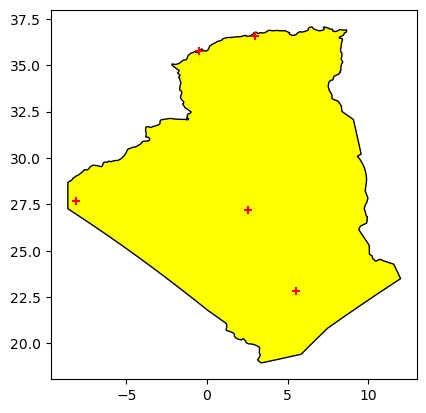

In [607]:
base = Algeria_4326.plot(color='yellow', edgecolor='black')
cities_Algeria_4326.plot(marker='+', color='red', markersize=40, ax=base)

### Mapa: Algeria y sus ríos

<Axes: >

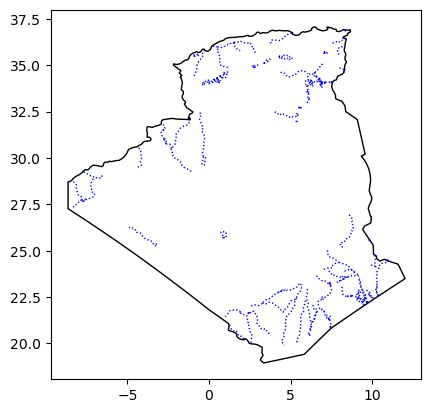

In [612]:
base = Algeria_4326.plot(color='white', edgecolor='black')
Ariver.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted', ax=base)

### Mapa: Algeria y sus aeropuertos

<Axes: >

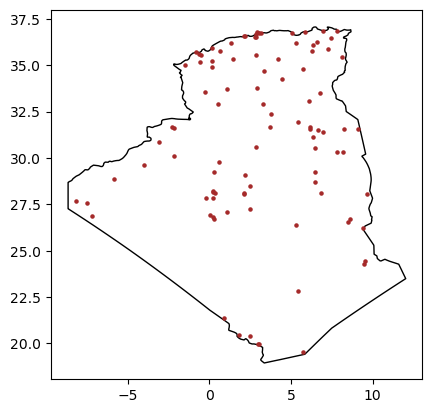

In [617]:
base = Algeria_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base, color='brown', markersize=5)

#### Mapa Final: Todas las capas

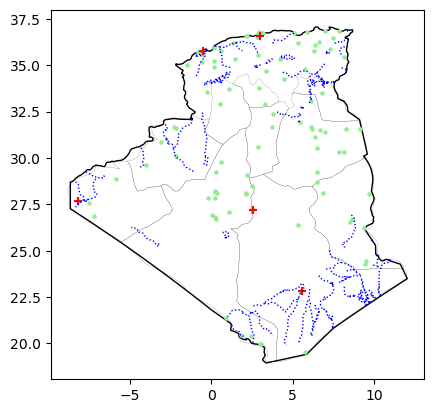

In [622]:
base = Algeria_4326.plot(color='white', edgecolor='black')

admin2_Algeria_4326.plot(facecolor='none', edgecolor='black', linewidth=0.1, ax=base)

#Aeropuertos con puntos pequeños
airports_4326.plot(ax=base, color='lightgreen', markersize=5)

#Ciudades un poco más grandes
cities_Algeria_4326.plot(marker='+', color='red', markersize=40, ax=base)

#Ríos de color azul
Ariver.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted', ax=base)

plt.show()